# Apply Statistic To Project 1

# Import libarary

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter



# Loading data

In [4]:
data = pd.read_csv('data/question1_data.csv')

In [74]:
data.head()

,Unnamed: 0,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,0,32,221.0,6.0
1,1,0,0,33,347.0,3.0
2,2,0,0,35,247.0,1.0
3,3,0,0,43,221.0,1.0
4,4,0,0,51,127.0,1.0


# Define function

In [91]:
#Emprical Circumlum density function
def ecdf(data):
    x = sorted(data)
    y = np.arange(1, len(x)+ 1)/len(x)
    return x,y

In [50]:
#Function for bootstrap replication
def bs_replicate_1d(data,func):
    return func(np.random.choice(data, size=len(data)))
def bs_draw_replicate(data, func, size = 1):
    #initialize array of replicate
    bs_rep = np.empty(size)
    #Genrate replicate
    for i in range(size):
        bs_rep[i]= bs_replicate_1d(data,func)
    return bs_rep    

# Do hypothesis test

- Do hypothesis test for total item count, as we group it by Month, shop_id, item_id

In [48]:
#Get the array data from item_cnt
origin = data.item_cnt_day

- we calculation the mean and standard deviation from the data we have for item count.

In [47]:
#calculation the mean and std of the origin series data
mean = np.mean(origin)
std = np.std(origin)

- we set them random seed to 47, so we can get same result all the time
- Next we do sampling, the mean of data set. We just random choice the point data from the data set then we just compute the mean. Then we repeated it 1000 to see if the mean of our data is same as our sampling.

In [57]:
#Do sampling 1000 time from the origin data
np.random.seed(47)
sampling = bs_draw_replicate(origin, np.mean, 1000)

In [110]:
mean_sampling = np.mean(sampling)
x,y = ecdf(sampling)


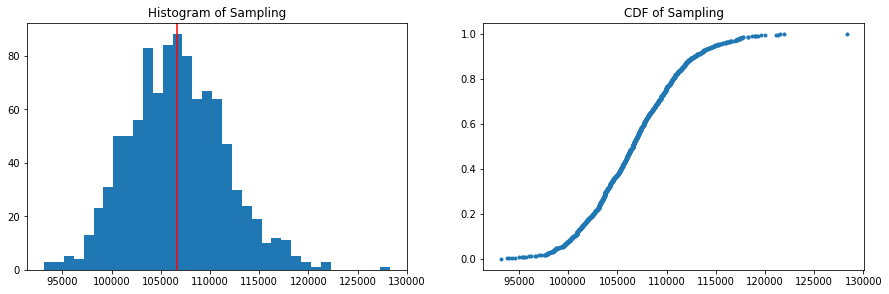

In [117]:
_ = plt.figure(figsize = (15,10))
_ = plt.subplot(2,2,1)
_ = plt.hist(sampling, bins = 35)
_ = plt.title('Histogram of Sampling')
_ = plt.axvline(mean_sampling, c = 'red')
_ = plt.subplot(2,2,2)
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.title('CDF of Sampling')

In [62]:
#calcualtion 95% confidence interval
confidence = np.percentile(sampling, [2.5, 97.5])
confidence

array([2.08404496, 2.10453191])

In [71]:
p_value = np.sum(sampling >= mean) / len(sampling)
p_value

0.497

- As p = 0.497, so we know that about 49,7% that data was higher than the mean
- And the 95% confidence interval is [2.084,2.104].
- The p value is so high so we can not reject Null hypothesis

# Hypothesis testing for Total sale of Month

In [87]:
data_month = data[['date_block_num','item_cnt_day']].groupby('date_block_num').sum()
#data_month = data[['date_block_num','item_cnt_day']]
data_month.head()

,item_cnt_day
date_block_num,
0,131850.0
1,128382.0
2,147438.0
3,107439.0
4,107147.0


In [114]:
month_mean = data_month.item_cnt_day.mean()
month_std = data_month.item_cnt_day.std()
month_mean, month_std

(107023.5, 28731.27335010027)

In [128]:
np.random.seed(47)
data_origin_month = data_month.item_cnt_day
sampling_month = bs_draw_replicate(data_origin_month,np.mean, 10000)

In [129]:
x_month, y_month = ecdf(data_origin_month)
x_sample, y_sample = ecdf(sampling_month)

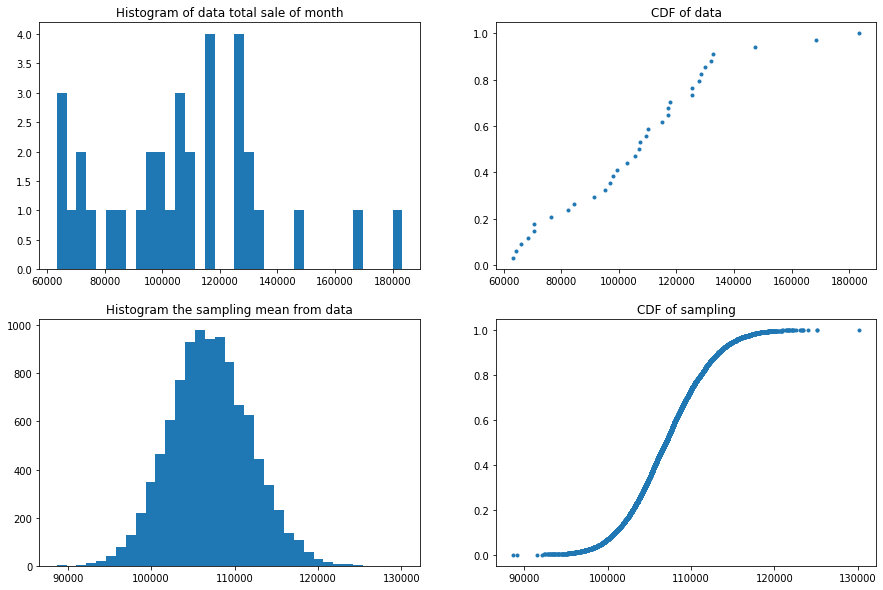

In [130]:
_ = plt.figure(figsize =(15,10))
_ = plt.subplot(2,2,1)
_ = plt.hist(data_origin_month, bins = 35)
_ = plt.title('Histogram of data total sale of month')
_ = plt.subplot(2,2,2)
_ = plt.plot(x_month, y_month, marker = '.', linestyle = 'none')
_ = plt.title('CDF of data')
_ = plt.subplot(2,2,3)
_ = plt.hist(sampling_month, bins = 35)
_ = plt.title('Histogram the sampling mean from data')
_ = plt.subplot(2,2,4)
_ = plt.plot(x_sample, y_sample, marker = '.', linestyle = 'none')
_ = plt.title('CDF of sampling')

In [131]:
p_value_month = np.sum(sampling_month >= month_mean) / len(sampling_month)
p_value_month

0.4967

In [132]:
month_confidence_interval = np.percentile(sampling_month, [2.5,97.5])
month_confidence_interval

array([ 97907.25147059, 116895.07647059])

- the p_value is 0.4967
- 95% confidence interval is [97907.25, 116895.08]
- We can not reject the Null Hypothesis


# Conclusion

- We can not reject Null hypothesis
- p-value is 0.4967
- the standard deviation is so large
- I tried to do 2 Null hypothesis test
    - the first one is total item sale for month and shop_id, item_id. So we have more data point. Cause we have more unique item_id
    - the second is for total item sale for month. we only have 34 data point because we only have 34 month data.
- The result we have the sample p_value

